In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Define headers from import85.names file
headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

In [3]:
#By scanning through the file we get to know that missing values are denoted by "?" hence they are replaced by NaN
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
                  header=None, names=headers, na_values="?" )

In [4]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [7]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

# Problem Statement
Find the price of a vehicle using given set of features

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized_losses,164.0,122.000000,35.442168,65.00,94.00,115.00,150.00,256.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,201.0,3.329751,0.273539,2.54,3.15,3.31,3.59,3.94
stroke,201.0,3.255423,0.316717,2.07,3.11,3.29,3.41,4.17


There are a total of 205 records. Out of which 6 columns have missing data or null data. Normalised loss is the field with highest missing data. Further understanding of the attributes would be required in order to drop or replace such values.

There are total of 205 records and 26 attributes in the given data set. Given the number of attributes the total number of records does not seem to be suficient. However considering the diversity of data it might be sufficient to build basic model. By observing the distribution of various attributes it can be observed that normalized_losses, curb_weight, engine_size, horsepower peak rpm and price have skewed data. This might be primarily due to missing variables. We need to further analyse and clean the data before model building exercise.

In [9]:
# Price is dependent variable and its 4 records are missing.So better lets drop it without loss of information
#Cleaning the price data
df = df[df.price.notnull()]


# Find out the number of values which are not numeric
#df['price'].str.isnumeric().value_counts()


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 26 columns):
symboling            201 non-null int64
normalized_losses    164 non-null float64
make                 201 non-null object
fuel_type            201 non-null object
aspiration           201 non-null object
num_doors            199 non-null object
body_style           201 non-null object
drive_wheels         201 non-null object
engine_location      201 non-null object
wheel_base           201 non-null float64
length               201 non-null float64
width                201 non-null float64
height               201 non-null float64
curb_weight          201 non-null int64
engine_type          201 non-null object
num_cylinders        201 non-null object
engine_size          201 non-null int64
fuel_system          201 non-null object
bore                 197 non-null float64
stroke               197 non-null float64
compression_ratio    201 non-null float64
horsepower           199 non-

In [23]:
#df[~df.applymap(np.isreal)]
#df[~df.applymap(np.isreal).all(1)]

In [8]:
#Problem statement : Predicting the price of car using all attributes/columns
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
door                  object
body                  object
drive-wheels          object
engine                object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [11]:
#Please check the distributio again
# For Columns that are integer and float - insert median/mean
for feature in df.columns:
    if df[feature].dtype == 'int64' or df[feature].dtype == 'float64':
        df[feature]=df[feature].fillna(df[feature].median())

In [13]:
# Another way for replacing missing values in normalized-losses with median
#df["normalized-losse"] = df["normalized-losses"].map( lambda x : df["normalized-losses"].median() if x == 0 else x)
# Check again if any columns has null values
df[df.isnull().any(axis=1)]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
27,1,148.0,dodge,gas,turbo,NaN,sedan,fwd,front,93.7,...,98,mpfi,3.03,3.39,7.6,102.0,5500.0,24,30,8558.0
63,0,115.0,mazda,diesel,std,NaN,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64.0,4650.0,36,42,10795.0


In [14]:
cleanup_nums = {"num_doors":     {"four": 4, "two": 2},
                "num_cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [15]:
df.replace(cleanup_nums, inplace=True)

In [17]:
# We can see that majority are with four doors, so we just replace the null with four
df = df.fillna("four")

In [18]:
# Checking Again
df[df.isnull().any(axis=1)]

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price


In [20]:
#another way of analysis
#temp = pd.DataFrame(df['normalized-losses'].str.isdigit())
#temp[temp['normalized-losses'] == False].count()

In [21]:
#another way of analysis
#df['door'] = df['door'].replace('?', np.nan)
#df

In [22]:
#another way of analysis
#df = df.dropna()
#df.head()

In [24]:
# normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price columns have 41,2,4,4,2,2,2,4 no of values missing 
#respectiviley
#df.median()

In [25]:
#df = df.replace('?', np.nan)
#df[df.isnull().any(axis=1)]

In [12]:
#df = df.fillna(df.median())
#df

#mpg_df = mpg_df.fillna(mpg_df.median())

#mpg_df = mpg_df.apply(lambda x: x.fillna(x.median()),axis=0)
#df = df.apply(lambda x: x.fillna(x.median()),axis=0)
#df

#df['normalized-losses'] = df['normalized-losses'].replace('?', np.nan)


In [26]:
#another way of analysis
#df['normalized-losses'] = df['normalized-losses'].fillna(df['normalized-losses'].median())
#df['bore'] = df['bore'].fillna(df['bore'].median())
#df['stroke'] = df['stroke'].fillna(df['stroke'].median())
#df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())
#df['peak-rpm'] = df['peak-rpm'].fillna(df['peak-rpm'].median())
#df['price'] = df['price'].fillna(df['price'].median())
#df

In [31]:
df['normalized_losses'] = df['normalized_losses'].astype('float64')
df['bore'] = df['bore'].astype('float64')
df['stroke'] = df['stroke'].astype('float64')
df['horsepower'] = df['horsepower'].astype('float64')
df['peak_rpm'] = df['peak_rpm'].astype('float64')
df['price'] = df['price'].astype('float64')


In [32]:
#Overally its not a bad dataset but it ll be great if some more values are added so the prediction ll be good. still i dont think
#so its a good representation of universe bcoz we never know about the universe data. 
df.corr()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,num_cylinders,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
symboling,1.000000,0.457735,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.118016,-0.110581,-0.142547,-0.004387,-0.182196,0.075486,0.279897,-0.035527,0.036233,-0.082391
normalized_losses,0.457735,1.000000,-0.075109,-0.009116,0.061799,-0.371830,0.065393,0.080549,0.073586,-0.052094,0.046024,-0.115967,0.182479,0.245899,-0.193896,-0.150773,0.094366
wheel_base,-0.535987,-0.075109,1.000000,0.876024,0.814507,0.590742,0.782097,0.348931,0.572027,0.494065,0.156740,0.250313,0.372156,-0.360946,-0.470606,-0.543304,0.584642
length,-0.365404,-0.009116,0.876024,1.000000,0.857170,0.492063,0.880665,0.440348,0.685025,0.609557,0.123016,0.159733,0.578683,-0.285301,-0.665192,-0.698142,0.690628
width,-0.242423,0.061799,0.814507,0.857170,1.000000,0.306002,0.866201,0.520118,0.729436,0.544986,0.188605,0.189867,0.614146,-0.245273,-0.633531,-0.680635,0.751265
height,-0.550160,-0.371830,0.590742,0.492063,0.306002,1.000000,0.307581,0.007776,0.074694,0.182946,-0.064380,0.259737,-0.086078,-0.310513,-0.049800,-0.104812,0.135486
curb_weight,-0.233118,0.065393,0.782097,0.880665,0.866201,0.307581,1.000000,0.604454,0.849072,0.644434,0.166809,0.156433,0.757961,-0.279429,-0.749543,-0.794889,0.834415
num_cylinders,-0.118016,0.080549,0.348931,0.440348,0.520118,0.007776,0.604454,1.000000,0.847639,0.205936,0.008480,-0.018138,0.669385,-0.152422,-0.439432,-0.473746,0.708645
engine_size,-0.110581,0.073586,0.572027,0.685025,0.729436,0.074694,0.849072,0.847639,1.000000,0.574504,0.203043,0.028889,0.822167,-0.256503,-0.650546,-0.679571,0.872335
bore,-0.142547,-0.052094,0.494065,0.609557,0.544986,0.182946,0.644434,0.205936,0.574504,1.000000,-0.055539,0.001544,0.565324,-0.269301,-0.580059,-0.589613,0.543158


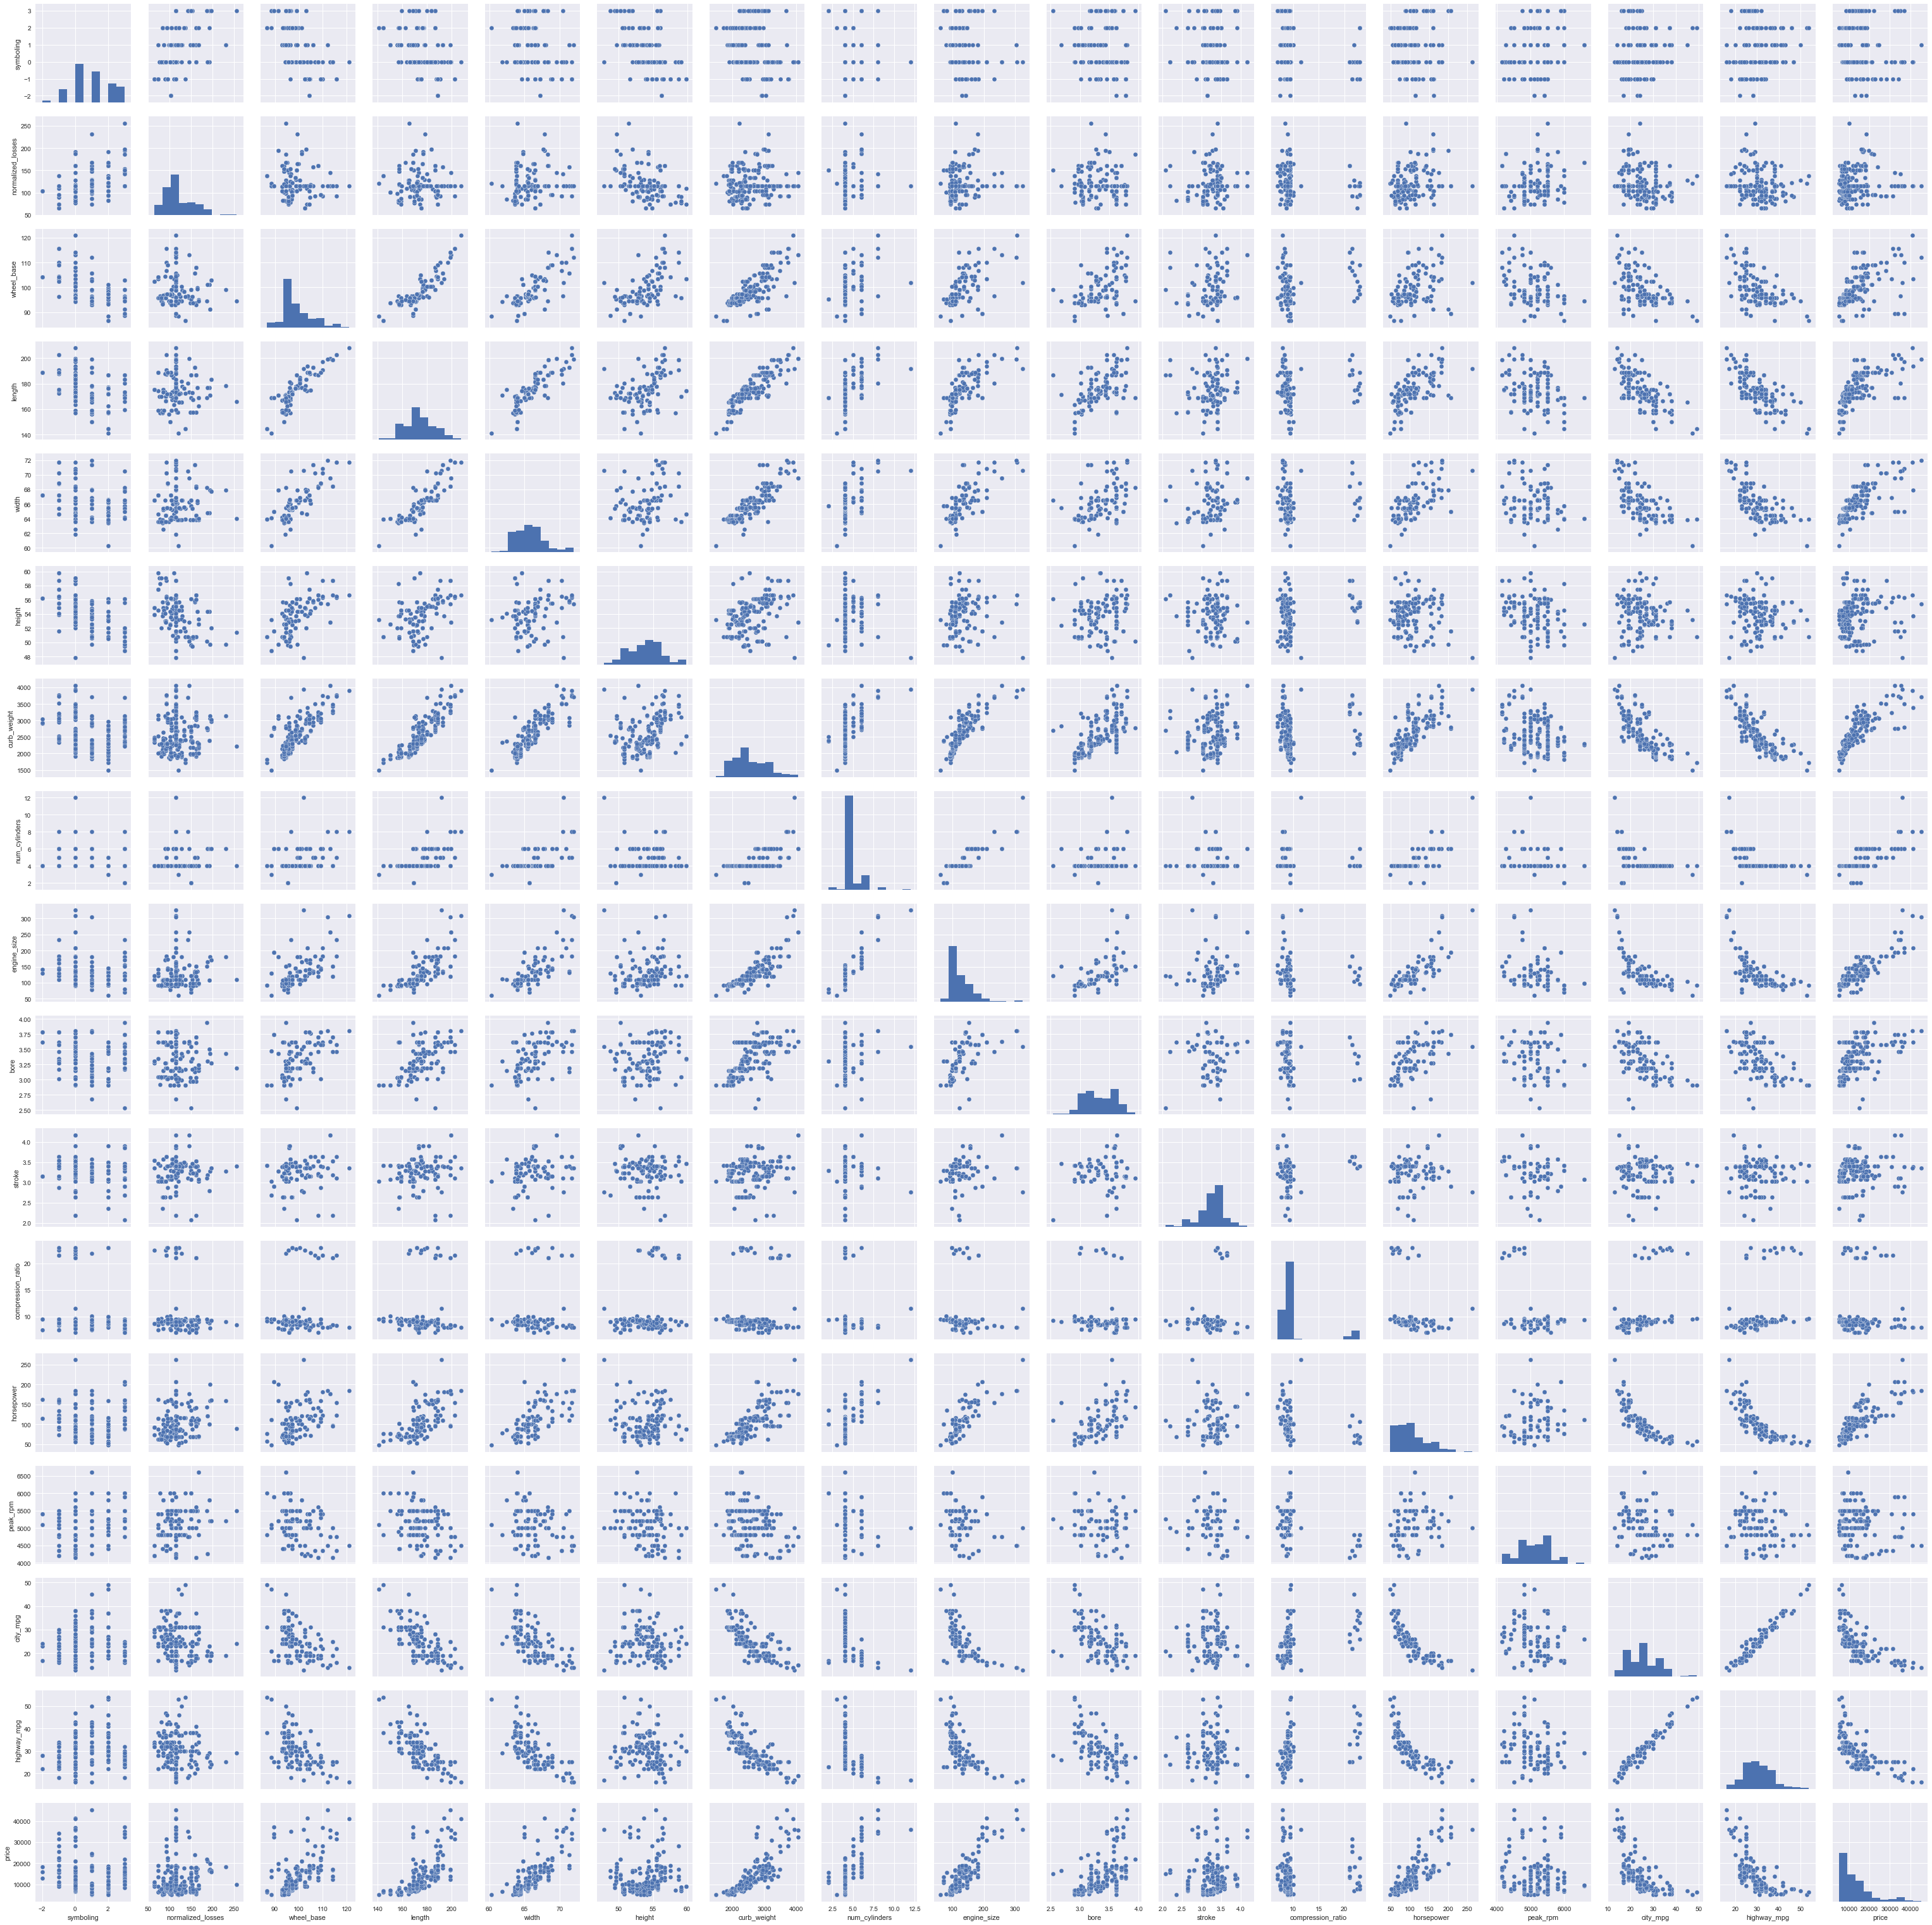

In [33]:
sns.pairplot(df)

In [34]:
df.corr()['price']
#here we can see lhorsepower,engine size,curb weight have stronger relation with price column

symboling           -0.082391
normalized_losses    0.094366
wheel_base           0.584642
length               0.690628
width                0.751265
height               0.135486
curb_weight          0.834415
num_cylinders        0.708645
engine_size          0.872335
bore                 0.543158
stroke               0.082209
compression_ratio    0.071107
horsepower           0.810500
peak_rpm            -0.102310
city_mpg            -0.686571
highway_mpg         -0.704692
price                1.000000
Name: price, dtype: float64

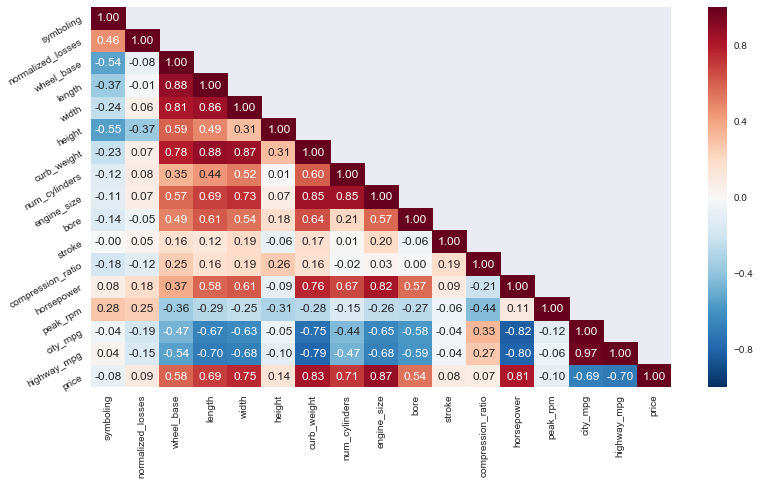

In [35]:
corr = df.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(13,7))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

In [36]:
sns.set(style="whitegrid", color_codes=True)

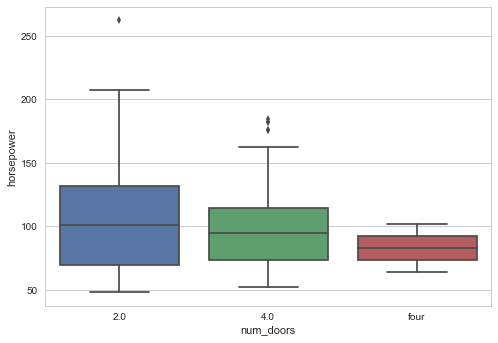

In [37]:
px= sns.boxplot(x="num_doors", y="horsepower", data=df)

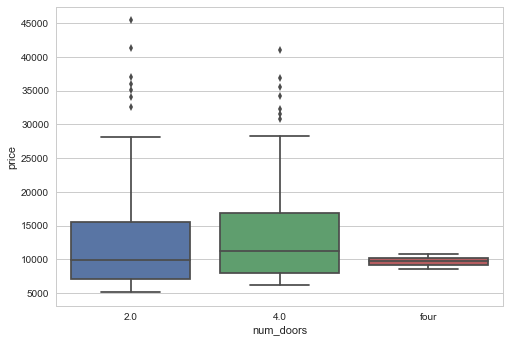

In [39]:
px= sns.boxplot(x="num_doors", y="price", data=df)


In [40]:
#Horsepower for two door cars show huge variation with a few outliers as well
#Price also shows huge variation

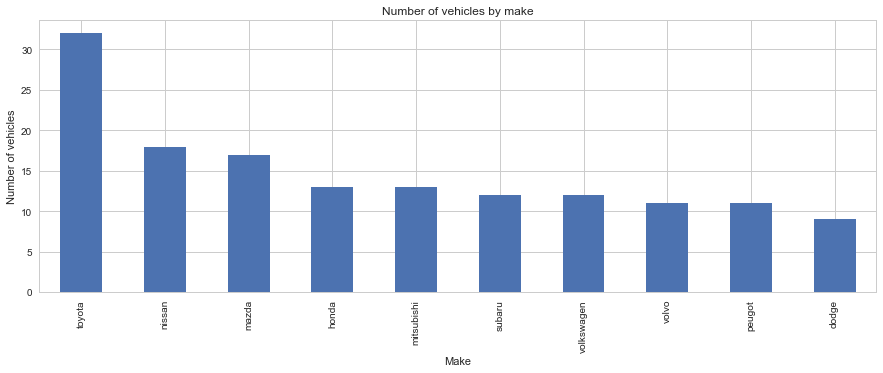

In [41]:
#Vehicle make frequency diagram
df.make.value_counts().nlargest(10).plot(kind='bar', figsize=(15,5))
plt.title("Number of vehicles by make")
plt.ylabel('Number of vehicles')
plt.xlabel('Make');

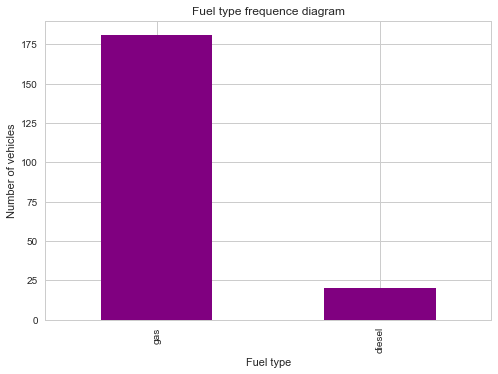

In [42]:
# Fuel Type bar chart 
df['fuel_type'].value_counts().plot(kind='bar',color='purple')
plt.title("Fuel type frequence diagram")
plt.ylabel('Number of vehicles')
plt.xlabel('Fuel type');

In [43]:
#We have taken some key features of the automobile dataset for this analysis and below are our findings.

#Toyota is the make of the car which has most number of vehicles with more than 40% than the 2nd highest Nissan
#Most preferred fuel type for the customer is standard vs trubo having more than 80% of the choice
#For drive wheels, front wheel drive has most number of cars followed by rear wheel and four wheel. There are very less number of cars for four wheel drive.
#Curb weight of the cars are distributed between 1500 and 4000 approximately
#Symboling or the insurance risk rating have the ratings between -3 and 3
#however for our dataset it starts from -2. There are more cars in the range of 0 and 1.
#Normalized losses which is the average loss payment per insured vehicle year is has more number of cars in the range between 65 and 150.

In [46]:
df.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [49]:
#as we ll predict the car price here , so i think linear regression l be a better option.so implementing here
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = df.drop(['symboling','make','fuel_type','aspiration','num_doors','body_style','drive_wheels','engine_location','engine_type','num_cylinders','fuel_system','bore','stroke','compression_ratio','price'], axis=1)

# Copy the 'price' column alone into the y dataframe. This is the dependent variable
y = df[['price']]

In [50]:
# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [51]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for normalized_losses is 6.845329455469248
The coefficient for wheel_base is 26.005956081910483
The coefficient for length is -90.85961445703353
The coefficient for width is 538.0529620662294
The coefficient for height is 336.4225428036779
The coefficient for curb_weight is 2.4862772653347656
The coefficient for engine_size is 117.26008670311354
The coefficient for horsepower is 37.46751195465511
The coefficient for peak_rpm is 1.8306861730830881
The coefficient for city_mpg is -280.1088969971343
The coefficient for highway_mpg is 272.3327036955397


In [53]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -63678.306476017366


In [54]:
regression_model.score(X_test, y_test)

0.78576903286754485

In [55]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
import math

math.sqrt(mse)

3260.881740156597

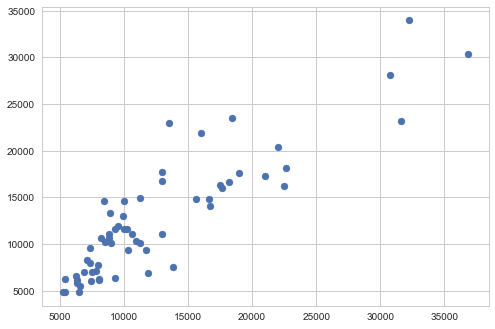

In [56]:
y_pred = regression_model.predict(X_test)
plt.scatter(y_test, y_pred)